In [20]:
# weight of a popcorn box
import numpy as np
import pandas as pd

In [21]:
# data randomly generated
pop = pd.DataFrame({'weight':np.random.randint(110,130,50)})
pop.head()

,weight
0,123
1,125
2,125
3,118
4,118


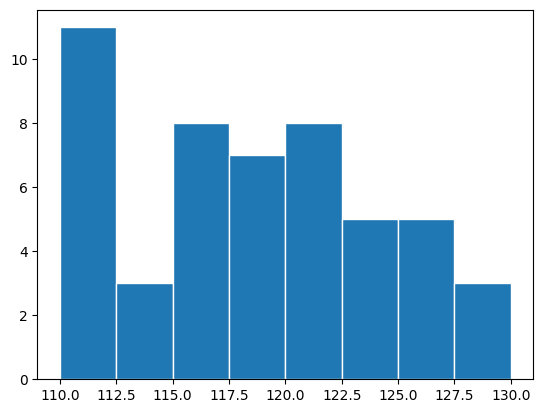

In [22]:
import matplotlib.pyplot as plt
plt.hist(pop['weight'], edgecolor='w', bins=np.arange(110,131,2.5))
plt.show()

In [23]:
# data following the normal distribution
pop_normal = pd.DataFrame({'weight':np.random.normal(120,15,50)})
pop_normal.head()

,weight
0,132.444422
1,123.939645
2,117.452454
3,130.822871
4,112.204738


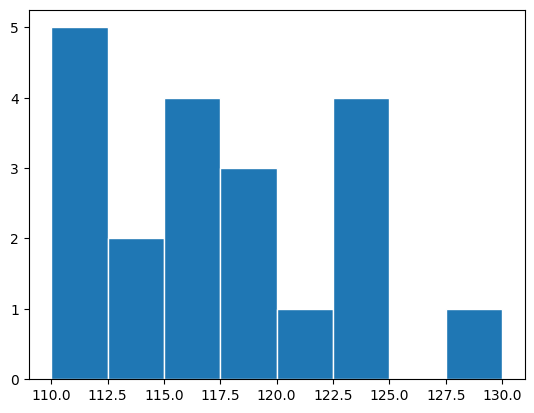

In [24]:
plt.hist(pop_normal['weight'], edgecolor='w', bins=np.arange(110,131,2.5))
plt.show()

In [31]:
# data following the normal distribution
pop_normal2 = pd.DataFrame({'weight':np.random.normal(110,15,50)})
pop_normal2.head()

,weight
0,106.394317
1,111.684102
2,140.633066
3,126.734940
4,108.792883


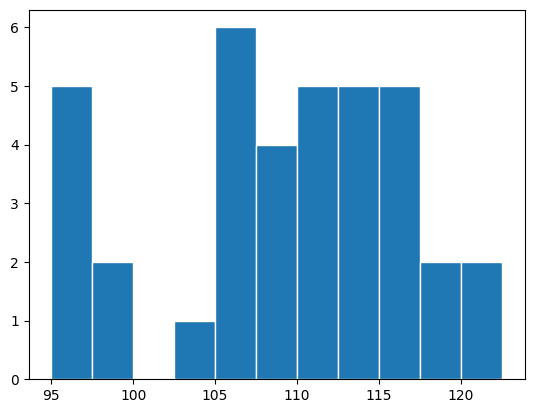

In [32]:
plt.hist(pop_normal2['weight'], edgecolor='w', bins=np.arange(95,125,2.5))
plt.show()

In [33]:
# test its normality first with Shapro-Wilk test
from scipy import stats
print('pop : ', stats.shapiro(pop['weight']))
print('pop_normal : ', stats.shapiro(pop_normal['weight']))
print('pop_normal : ', stats.shapiro(pop_normal2['weight']))

pop :  ShapiroResult(statistic=0.9565582948756922, pvalue=0.06380046451416302)
pop_normal :  ShapiroResult(statistic=0.9805500473542228, pvalue=0.5753841036935687)
pop_normal :  ShapiroResult(statistic=0.9708437402024751, pvalue=0.250396139301143)


Whereas the pop does not follow the normal distribution, the others do. Use the <strong>Wilcoxon test</strong> for the non-normal distribution and <strong>t-test</strong> for the other.

T1. <strong>two-tailed test</strong>
<ul>
    <li>H0 : the average weight of popcorn boxes is 120</li>
    <li>H1 : the average weight of popcorn boxes is not 120</li>
</ul>

In [29]:
from scipy import stats
print('pop : ', stats.wilcoxon(pop['weight']-120))
print('pop_normal : ', stats.ttest_1samp(pop_normal['weight'], 120))

pop :  WilcoxonResult(statistic=384.0, pvalue=0.056324175794697076)
pop_normal :  TtestResult(statistic=0.9208170180265041, pvalue=0.3616574014048297, df=49)


In both cases, we <strong>accept the H0</strong> as their pvalues are higher than the significant level 0.05.

In [34]:
print('pop_normal : ', stats.ttest_1samp(pop_normal2['weight'], 120))

pop_normal :  TtestResult(statistic=-5.125080313329174, pvalue=5.030467050265728e-06, df=49)


In the third case, we reject H0 and thereby conclude that their mean is not 120.

T2. <strong>one-tailed test</strong>
<br>(1) Left test 
<ul>
    <li>H0 : m = 120</li>
    <li>H1 : m &lt; 120</li>
</ul>
(2) Right test
<ul>
    <li>H0 : m = 120</li>
    <li>H1 : 120 &lt; m</li>
</ul>
&#42;Note that the equal sign is not allowed for H1.

In [38]:
# Left test (alternative='less')
print('pop : ', stats.wilcoxon(pop['weight']-120, alternative='less'))
print('pop_normal : ', stats.ttest_1samp(pop_normal['weight'], 120, alternative='less'))
print('pop_normal2 : ', stats.ttest_1samp(pop_normal2['weight'], 120, alternative='less'))

pop :  WilcoxonResult(statistic=384.0, pvalue=0.028162087897348538)
pop_normal :  TtestResult(statistic=0.9208170180265041, pvalue=0.8191712992975851, df=49)
pop_normal2 :  TtestResult(statistic=-5.125080313329174, pvalue=2.515233525132864e-06, df=49)


Accept H0 only in the second case. The aplha error occurs in the first!

In [39]:
# Right test (alternative='less')
print('pop : ', stats.wilcoxon(pop['weight']-120, alternative='greater'))
print('pop_normal : ', stats.ttest_1samp(pop_normal['weight'], 120, alternative='greater'))
print('pop_normal2 : ', stats.ttest_1samp(pop_normal2['weight'], 120, alternative='greater'))

pop :  WilcoxonResult(statistic=384.0, pvalue=0.9718379121026515)
pop_normal :  TtestResult(statistic=0.9208170180265041, pvalue=0.18082870070241486, df=49)
pop_normal2 :  TtestResult(statistic=-5.125080313329174, pvalue=0.9999974847664749, df=49)


Accept H0 in all the cases; the beta error occurs in the last.